In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

In [2]:
sns.set(rc={'figure.figsize' : (8, 5) })

In [3]:
blobs2 = pd.read_csv('/home/dario/Downloads/blobs2.csv')
blobs2.head()

,x,y,label
0,0.543066,3.931424,0
1,2.563694,3.473101,0
2,0.665973,2.781159,0
3,3.552344,1.538645,1
4,1.397117,0.668682,1


In [4]:
X = blobs2.drop(axis=1, columns=['label']).values
y = blobs2.label.apply(lambda x: -1 if x == 0 else 1).values

In [23]:
class perceptron:
    def __init__(self, with_pocket=True):
        self.with_pocket = with_pocket
        self.w = np.asarray([])
        
    def train(self, X, y, initial_weights=np.asarray([]), eps=1e-6):
        if len(initial_weights) != 0:
            self.w = initial_weights
        else:
            self.w = np.random.sample(X.shape[1]) * 10 - 5
        
        pocket = {'w': self.w, 'acc': self.__get_acc(X, y)}
        w_temp = self.w + 1
        for i in range(X.shape[0]):
            if self.__predict_one(X[i]) != y[i]:
                w_temp = self.w
                self.w = self.w + y[i] * X[i]

                if self.with_pocket:
                    acc = self.__get_acc(X, y)
                    if acc > pocket['acc']:
                        pocket['acc'] = acc
                        pocket['w'] = self.w
                else:
                    pocket['w'] = self.w
                
        self.w = pocket['w']
                
    def __get_acc(self, X, y):
        pred = self.predict(X)
        return accuracy_score(y, pred)
            
            
    def predict(self, X):
        pred = np.zeros((X.shape[0], ))
        for i in range(X.shape[0]):
            x_pred = self.__predict_one(X[i])
            pred[i] = 1 if x_pred >= 0 else -1
            
        return pred
        
    def __predict_one(self, x):
        return np.sign(self.w.T @ x)
        

In [18]:
def visualize(X, y, p, deg):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = p.predict(PolynomialFeatures(degree=deg).fit_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    sns.scatterplot(x='x', y='y', data=blobs2, hue='label', legend=False)
    plt.contour(xx, yy, Z, colors=['r', 'r'], linewidths=[0.5, 0.5])
    plt.title(f'Разделяющая плоскость (полиномиальные признаки степени {deg})')

In [19]:
def fit_deg(X, y, deg):
    X_poly = PolynomialFeatures(degree=deg).fit_transform(X)
    p = perceptron()
    p.train(X_poly, y)
    
    print(f'Точность классификации: {accuracy_score(y, p.predict(X_poly))}')

    visualize(X, y, p, deg=deg)

# Алгоритм персептрона с карманом 

Точность классификации: 0.971


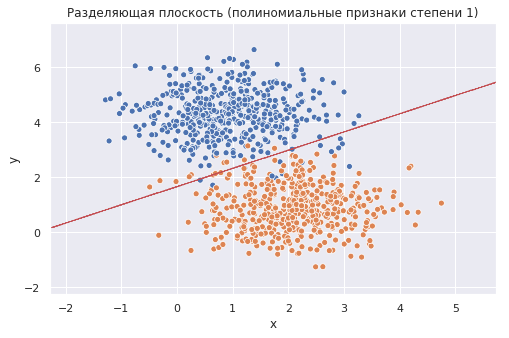

In [24]:
fit_deg(X, y, 1)

# Алгоритм персептрона с карманом для полиномиальных признаков

Точность классификации: 0.98


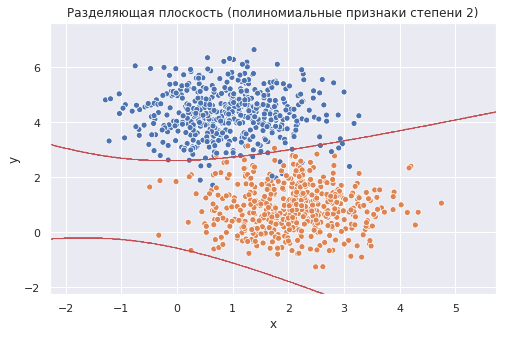

In [29]:
fit_deg(X,y,2)

Точность классификации: 0.97


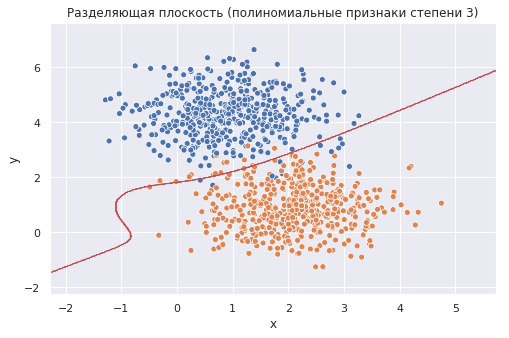

In [26]:
fit_deg(X,y,3)

Точность классификации: 0.977


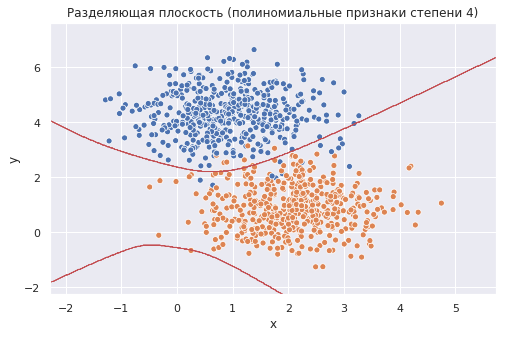

In [28]:
fit_deg(X,y,4)